In [33]:
#from google.colab import drive
#drive.mount('/content/drive')

## Import Libraries and Data

In [34]:
# Import Libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [35]:
# Import Data
data = pd.read_csv('Copy of device_data_1.xlsx - Sheet0.csv')
data.head()

,Time,Devicename,Temperature,TDS,PH,DO
0,Wed Jul 07 2021 14:15:09 GMT+0530 (India Stand...,867378035207325,29.0625,0.0,13.61598,9.91
1,Wed Jul 07 2021 14:16:14 GMT+0530 (India Stand...,867378035207325,29.0625,0.0,13.12313,9.90
2,Wed Jul 07 2021 14:17:18 GMT+0530 (India Stand...,867378035207325,29.0000,0.0,13.55723,9.90
3,Wed Jul 07 2021 14:18:23 GMT+0530 (India Stand...,867378035207325,29.0625,0.0,14.00000,9.90
4,Wed Jul 07 2021 14:19:28 GMT+0530 (India Stand...,867378035207325,29.0625,0.0,14.00000,9.90


## Data Analysis and Processing

In [36]:
# Drop fields which are not required for the model
df = data.drop(['Time', 'Devicename'], axis = 1)
df.head()

,Temperature,TDS,PH,DO
0,29.0625,0.0,13.61598,9.91
1,29.0625,0.0,13.12313,9.90
2,29.0000,0.0,13.55723,9.90
3,29.0625,0.0,14.00000,9.90
4,29.0625,0.0,14.00000,9.90


In [37]:
df.describe()

,Temperature,TDS,PH,DO
count,1150.000000,1150.000000,1150.000000,1150.000000
mean,26.042283,110.163128,5.813235,3.270148
std,1.265751,57.359872,1.716083,1.345019
min,24.875000,0.000000,4.875184,1.070000
25%,25.500000,124.877675,5.312549,2.610000
50%,25.687500,133.931700,5.413732,3.100000
75%,25.812500,136.523500,5.524703,3.450000
max,34.750000,744.276200,14.000000,9.940000


In [38]:
df.shape

(1150, 4)

array([[<AxesSubplot:title={'center':'DO'}>]], dtype=object)

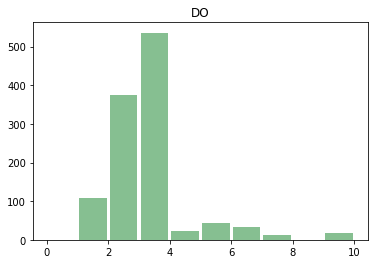

In [39]:
# visualize the datapoints in each range of "DO"
bins_list=[i for i in range(0,11)]
df.hist(column='DO', bins=bins_list, grid=False, color='#86bf91', zorder=2, rwidth=0.9)

It can be observed that majourity of our data lies in the region having DO between (2,4).

To improve this dataset we will replicate the datapoints for DO > 4.

In [40]:
tempDf=df[(df['DO'] >= 4) & (df['DO'] < 7)]     # data having 4<=DO<7

df=pd.concat([tempDf,tempDf,tempDf,df],ignore_index=True)     # replicated 3 times in the original dataset
df

,Temperature,TDS,PH,DO
0,27.4375,127.0223,6.696456,6.96
1,27.4375,124.8190,6.885760,6.81
2,27.4375,125.0000,6.582215,6.67
3,27.4375,125.0896,6.559371,6.54
4,27.4375,126.5262,6.428812,6.42
...,...,...,...,...
1448,30.0625,127.5950,14.000000,7.84
1449,30.0625,125.1168,14.000000,7.16
1450,30.1250,141.9695,14.000000,6.79
1451,30.1250,142.7360,14.000000,6.50


In [41]:
tempDf=df[(df['DO'] >= 7) & (df['DO'] < 10)]      # data having 7<=DO<10

df=pd.concat([tempDf,tempDf,tempDf,tempDf,tempDf,tempDf,tempDf,tempDf,df],ignore_index=True)    #replicating 8 times in the original dataset
df

,Temperature,TDS,PH,DO
0,29.0625,0.0000,13.61598,9.91
1,29.0625,0.0000,13.12313,9.90
2,29.0000,0.0000,13.55723,9.90
3,29.0625,0.0000,14.00000,9.90
4,29.0625,0.0000,14.00000,9.90
...,...,...,...,...
1688,30.0625,127.5950,14.00000,7.84
1689,30.0625,125.1168,14.00000,7.16
1690,30.1250,141.9695,14.00000,6.79
1691,30.1250,142.7360,14.00000,6.50


In [42]:
df = df.sample(frac=1).reset_index(drop=True)    # randomizing the data
df

,Temperature,TDS,PH,DO
0,29.0000,0.000000,13.155770,9.90
1,27.3750,132.483100,6.327629,5.27
2,25.2500,0.000006,5.394149,3.65
3,29.0000,0.000000,13.172080,9.90
4,34.7500,137.699900,6.875968,6.29
...,...,...,...,...
1688,26.3125,125.124300,5.691163,3.27
1689,25.5000,135.964600,5.400675,2.42
1690,27.3750,124.565000,6.611590,5.58
1691,25.4375,135.778700,5.387618,3.29


array([[<AxesSubplot:title={'center':'DO'}>]], dtype=object)

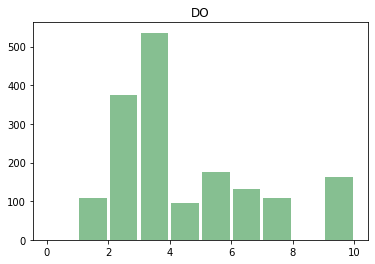

In [43]:
# visualize the datapoints in each range of "DO"
bins_list=[i for i in range(0,11)]
df.hist(column='DO', bins=bins_list, grid=False, color='#86bf91', zorder=2, rwidth=0.9)

As we can observe, now the data is more evenly distributed than the previous one.  
This will improve the accuracy of our model.

<AxesSubplot:>

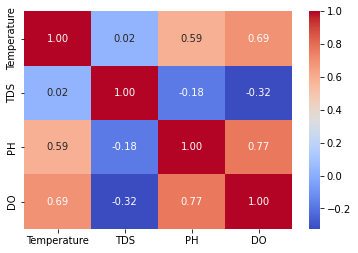

In [44]:
# Heatmap of the features. This shows how the features of our data depend on each other.
sns.heatmap(df[["Temperature","TDS","PH","DO"]].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

We can clearly see by DO is closely related to PH and Temperature.  
TDS is somewhat inversely related to DO.

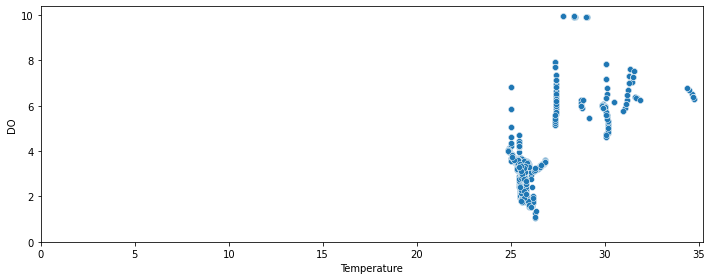

In [45]:
# Plot for Temperature vs DO
plt.figure(figsize = (10,4), tight_layout = True)
sns.scatterplot(x = df['Temperature'], y = df['DO'])

plt.xlim(0)
plt.ylim(0)
plt.show()

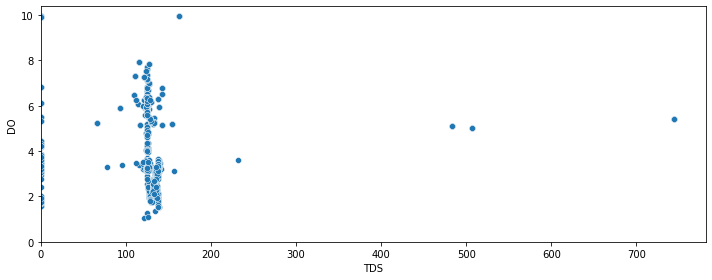

In [46]:
# Plot for TDS vs DO
plt.figure(figsize = (10,4), tight_layout = True)
sns.scatterplot(x = df['TDS'], y = df['DO'])

plt.xlim(0)
plt.ylim(0)
plt.show()

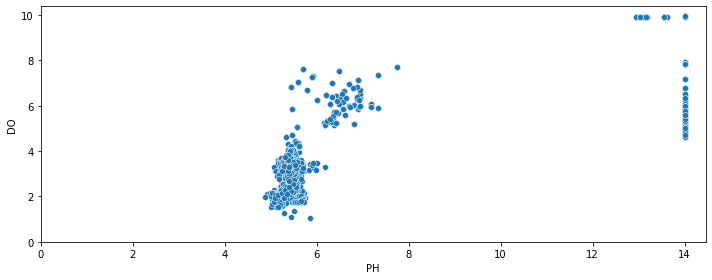

In [47]:
# Plot for PH vs DO
plt.figure(figsize = (10,4), tight_layout = True)
sns.scatterplot(x = df['PH'], y = df['DO'])

plt.xlim(0)
plt.ylim(0)
plt.show()

In [48]:
# Normalizing the data
df['Temperature']=df['Temperature']/max(df['Temperature'])
df['TDS']=df['TDS']/max(df['TDS'])
df['PH']=df['PH']/max(df['PH'])
df.head()

,Temperature,TDS,PH,DO
0,0.834532,0.000000e+00,0.939698,9.90
1,0.787770,1.780026e-01,0.451973,5.27
2,0.726619,7.705818e-09,0.385296,3.65
3,0.834532,0.000000e+00,0.940863,9.90
4,1.000000,1.850118e-01,0.491141,6.29


In [49]:
# Check for NULL values
df.isnull().sum()

Temperature    0
TDS            0
PH             0
DO             0
dtype: int64

In [50]:
# Standard Scaling 

from sklearn.preprocessing import StandardScaler
df['Temperature'] = StandardScaler().fit_transform(df['Temperature'].values.reshape(-1,1))
df['PH'] = StandardScaler().fit_transform(df['PH'].values.reshape(-1,1))
df['TDS'] = StandardScaler().fit_transform(df['TDS'].values.reshape(-1,1))
df.head()

,Temperature,TDS,PH,DO
0,1.015915,-1.545290,1.924978,9.90
1,0.217925,0.392876,-0.237820,5.27
2,-0.825600,-1.545290,-0.533497,3.65
3,1.015915,-1.545290,1.930144,9.90
4,3.839572,0.469195,-0.064134,6.29


## Split Data

In [51]:
x = df.iloc[:, :-1]     # input features
y = df.iloc[:, -1]      # output feature

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.1, random_state = 20)

print("Number of fields in Training data = ",len(x_train))
print("Number of fields in Testing data = ",len(x_test))

Number of fields in Training data =  1523
Number of fields in Testing data =  170


In [52]:
x_train.head()

,Temperature,TDS,PH
611,3.655421,0.272715,-0.094115
694,-0.641449,0.462930,-0.560378
1215,-0.580065,0.430244,-0.532464
1456,2.304976,0.314409,-0.062066
120,-0.948368,-1.545290,-0.534532


In [53]:
y_train.head()

611     6.77
694     3.06
1215    2.85
1456    6.38
120     3.61
Name: DO, dtype: float64

## Model

In [54]:
# Setup
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [55]:
# Defining function for Root Mean Squared Error
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [56]:
# Model Design

tf.random.set_seed(42)

model = Sequential([
    Dense(150, activation='relu'),
    Dense(450, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1)
])

model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)

This model contains a 3-layered Neural Network with 'relu' as the activation function. 
- 150 neurons for first layer
- 450 neurons for first layer
- 100 neurons for first layer

In [ ]:
# Training the data set
model.fit(x_train, y_train, epochs=1000)

In [58]:
# Evaluate the model
model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.2854 - rmse: 0.2741


[0.28539907932281494, 0.27405157685279846]

In [59]:
# Make predictions for the testing data
pred = model.predict(x_test)

In [60]:
df_pred = pd.DataFrame(pred)
print("Prediction stats: ")
df_pred.describe()

Prediction stats: 


,0
count,170.000000
mean,4.578084
std,2.308383
min,1.672224
25%,2.932594
50%,3.453239
75%,6.116743
max,9.873835


In [61]:
print("y_test stats: ")
y_test.describe()

y_test stats: 


count    170.000000
mean       4.582941
std        2.361466
min        1.100000
25%        2.942500
50%        3.495000
75%        6.070000
max        9.940000
Name: DO, dtype: float64

We can compare the stats for pred and y_test

In [62]:
# Error Calculation
err = 0
pred = pred.flatten()
y_test = np.array(y_test)

for i in range(0,len(pred)):
  err = err + abs(pred[i]-y_test[i])/y_test[i]

err = err/pred.shape[0]

err

0.05237424066070087

In [63]:
# Difference between predicted and true value 
yy=abs(pred-y_test)
print("Mean : ", np.mean(yy))
print("Median : ", np.median(yy))

Mean :  0.1714314426534316
Median :  0.09088923931121817


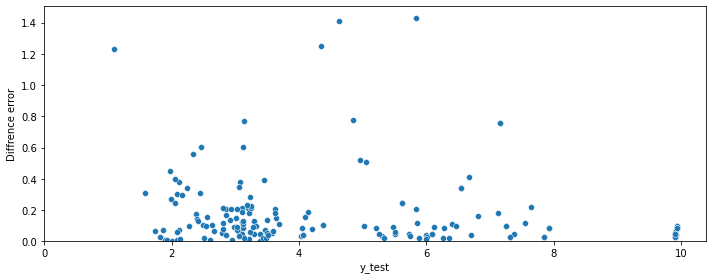

In [64]:
# Scatter-plot of yy
plt.figure(figsize = (10,4), tight_layout = True)
sns.scatterplot(x = y_test, y = yy)

plt.xlabel('y_test')
plt.ylabel('Diffrence error')

plt.xlim(0)
plt.ylim(0)
plt.show()

## Conclusion:
- It is observed that now the difference error is relatively less than what it was observed earlier.

#### Note: 
- The data replication should be less. If we replicate the data multiple number of times then there would be chances of Overfitting.
